# Разведочный анализ данных. Исследование и визуализация данных.
## 1) Текстовое описание набора данных
В качестве набора данных мы будем использовать набор данных для распознавания вин - https://scikit-learn.org/stable/datasets/toy_dataset.html

Эта задача является очень актуальной для продавцов вина, которым необходимо найти нужное вино.

Количество экземпляров: 178

Сорта:
```
• class_0 (59)
• class_1 (71)
• class_2 (48)
```


Информация об атрибутах:
```
• Alcohol - алкоголь
• Malic acid - яблочная кислота
• Ash - пепел
• Alcalinity of ash - щелочность пепла
• Magnesium - магний
• Total phenols - всего фенолов
• Flavanoids - флавоноиды
• Nonflavanoid phenols - нефлаваноидные фенолы
• Proanthocyanins - проантоцианы
• Color intensity - интенсивность цвета
• Hue - оттенок
• OD280/OD315 of diluted wines - OD280/OD315 разбавленных вин
• Proline - пролин
```

## Импорт библиотек
Импортируем библиотеки с помощью команды import.

In [1]:
!pip install numpy
import numpy as np
!pip install pandas
import pandas as pd
!pip install sklearn
from sklearn.datasets import *
!pip install seaborn
import seaborn as sns
!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

## Загрузка данных
Загрузим файлы датасета в помощью библиотеки Pandas и Sklearn.

Нужный нам датасет можно загрузить с помощью команды: 

In [2]:
wine = load_wine()
type(wine)

sklearn.utils.Bunch

Преобразование датасета Scikit-learn в Pandas Dataframe:

In [3]:
data1 = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

## 2) Основные характеристики датасета

Датасет возвращается в виде словаря с ключами, которые можно получить, выполнив следующую команду:

In [4]:
for x in wine:
    print(x)

data
target
frame
target_names
DESCR
feature_names


In [5]:
# Название сортов:
print(wine['target_names'])

['class_0' 'class_1' 'class_2']


In [6]:
# Список колонок с типами данных
data1.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

In [7]:
# Размерность данных
print(wine['data'].shape)

(178, 13)


In [8]:
# Размерность целевого признака
print(wine['target'].shape)

(178,)


In [9]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data1.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data1[data1[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

alcohol - 0
malic_acid - 0
ash - 0
alcalinity_of_ash - 0
magnesium - 0
total_phenols - 0
flavanoids - 0
nonflavanoid_phenols - 0
proanthocyanins - 0
color_intensity - 0
hue - 0
od280/od315_of_diluted_wines - 0
proline - 0
target - 0


In [10]:
# Основные статистические характеристки набора данных
data1.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

## 3) Визуальное исследование датасета
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

### Диаграмма рассеяния
Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

<AxesSubplot:xlabel='alcohol', ylabel='ash'>

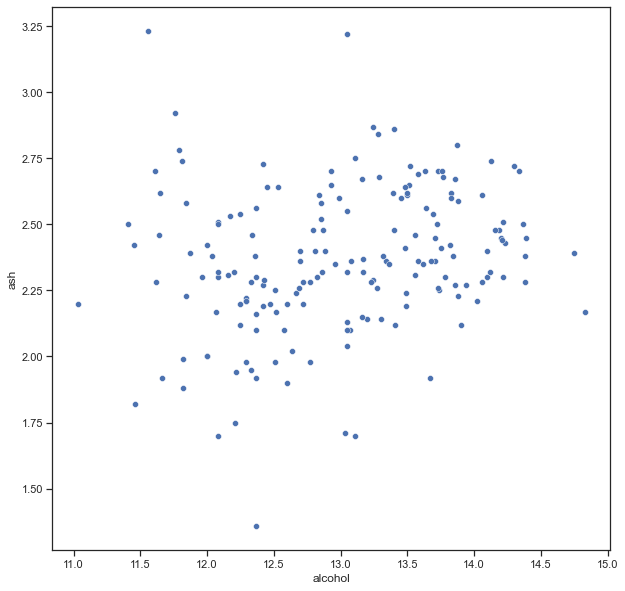

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='alcohol', y='ash', data=data1)

<AxesSubplot:xlabel='alcohol', ylabel='ash'>

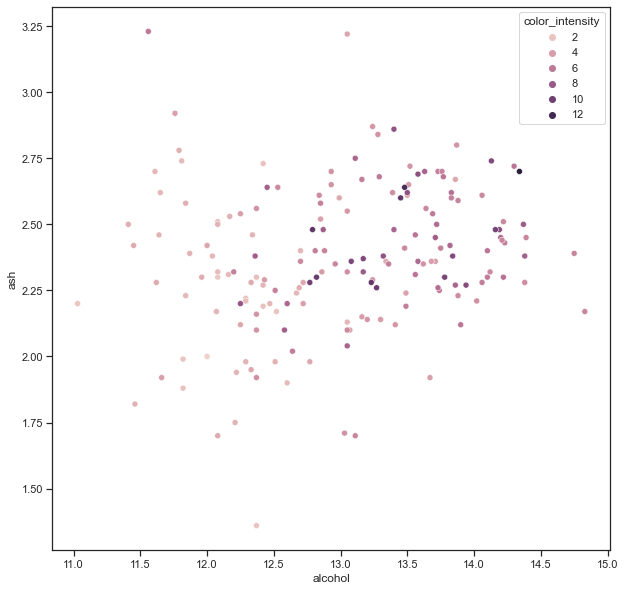

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='alcohol', y='ash', data=data1, hue='color_intensity')

### Гистограмма
Позволяет оценить плотность вероятности распределения данных.

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

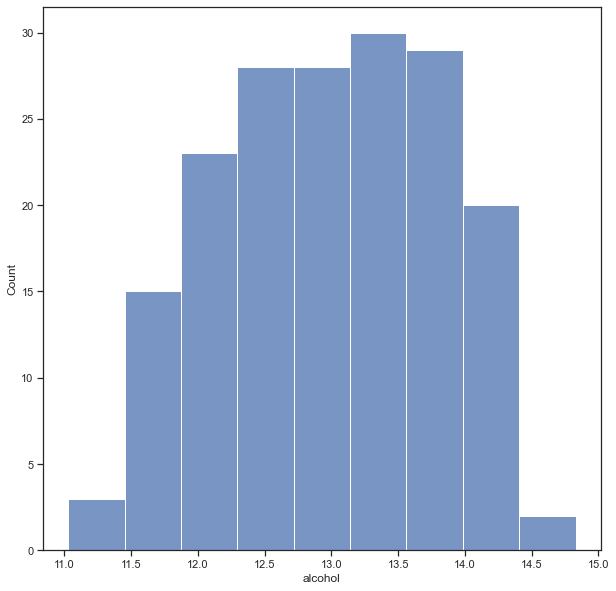

In [13]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(data1['alcohol'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

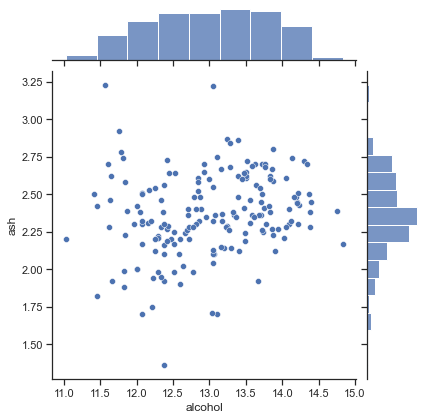

In [14]:
sns.jointplot(x='alcohol', y='ash', data=data1)

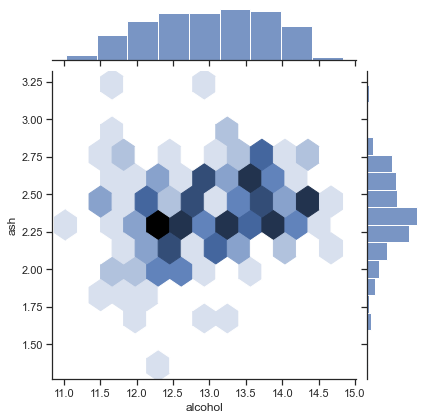

In [15]:
sns.jointplot(x='alcohol', y='ash', data=data1, kind="hex")

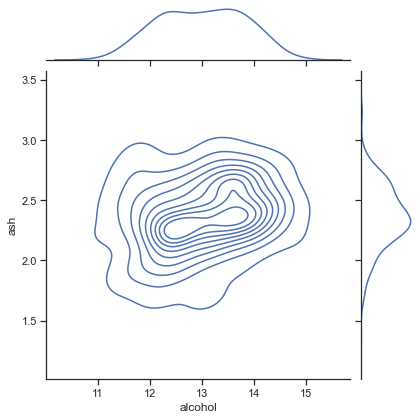

In [16]:
sns.jointplot(x='alcohol', y='ash', data=data1, kind="kde")

### "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

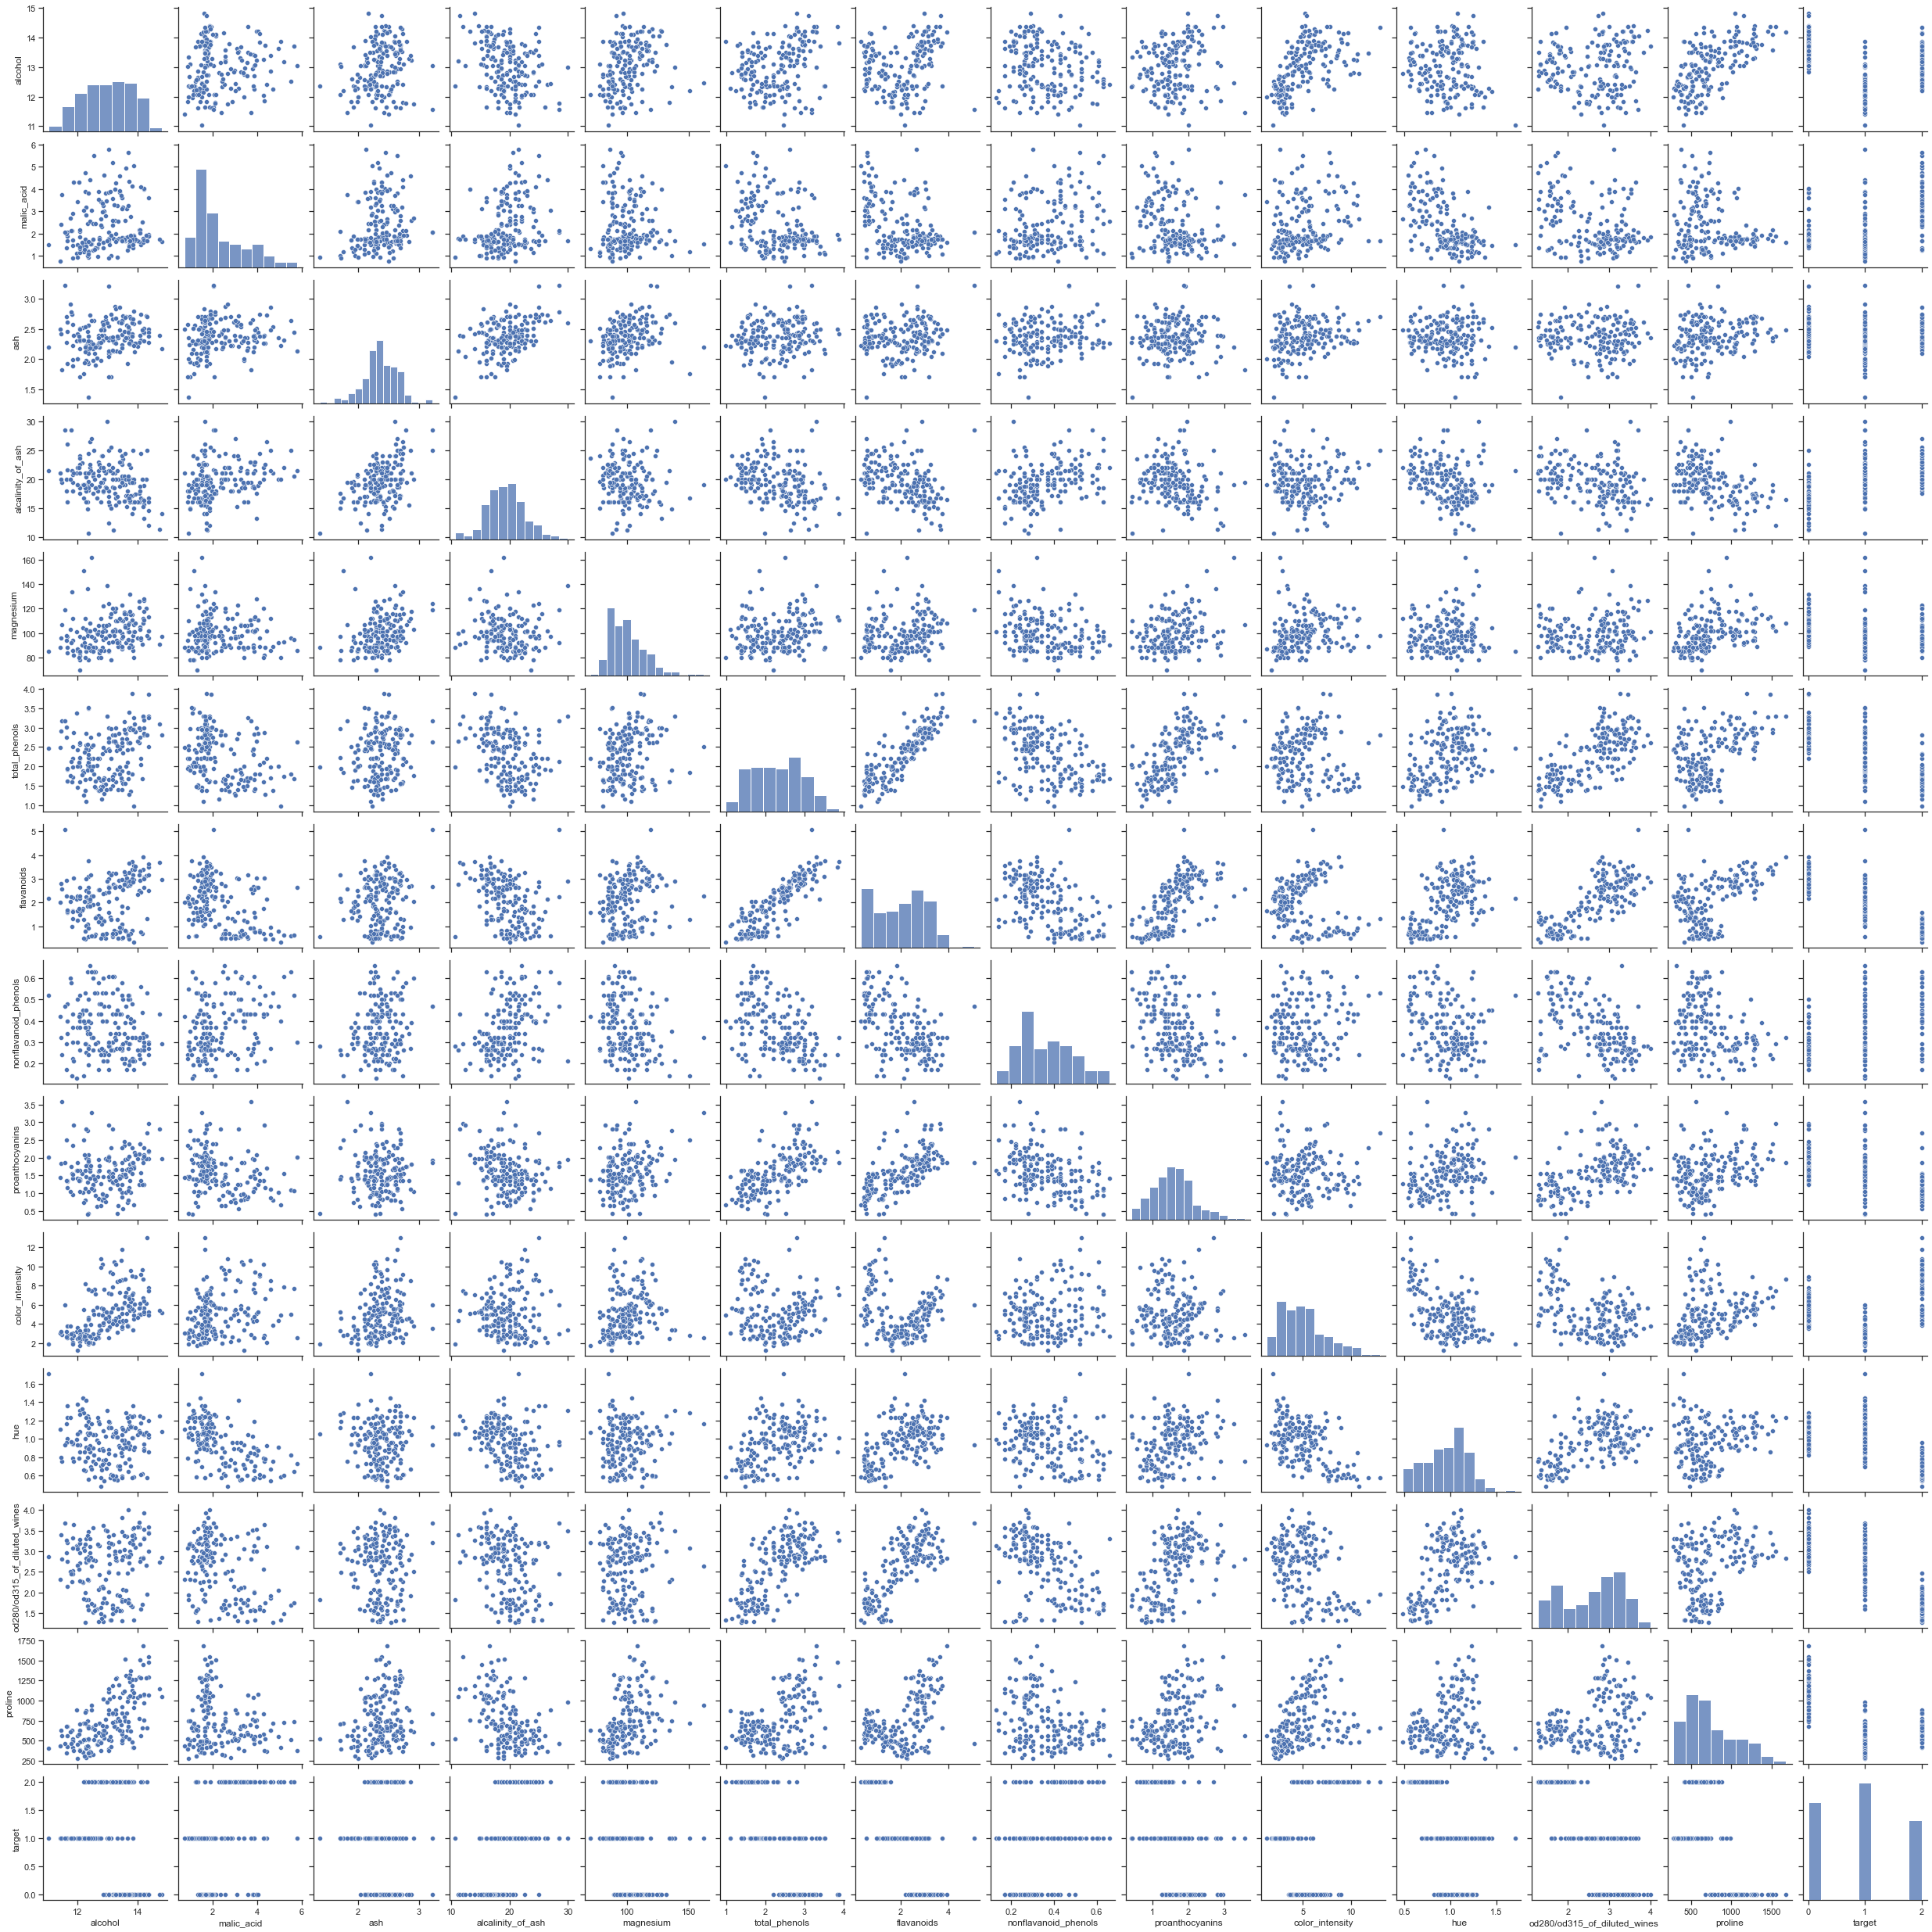

In [17]:
sns.pairplot(data1)

С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

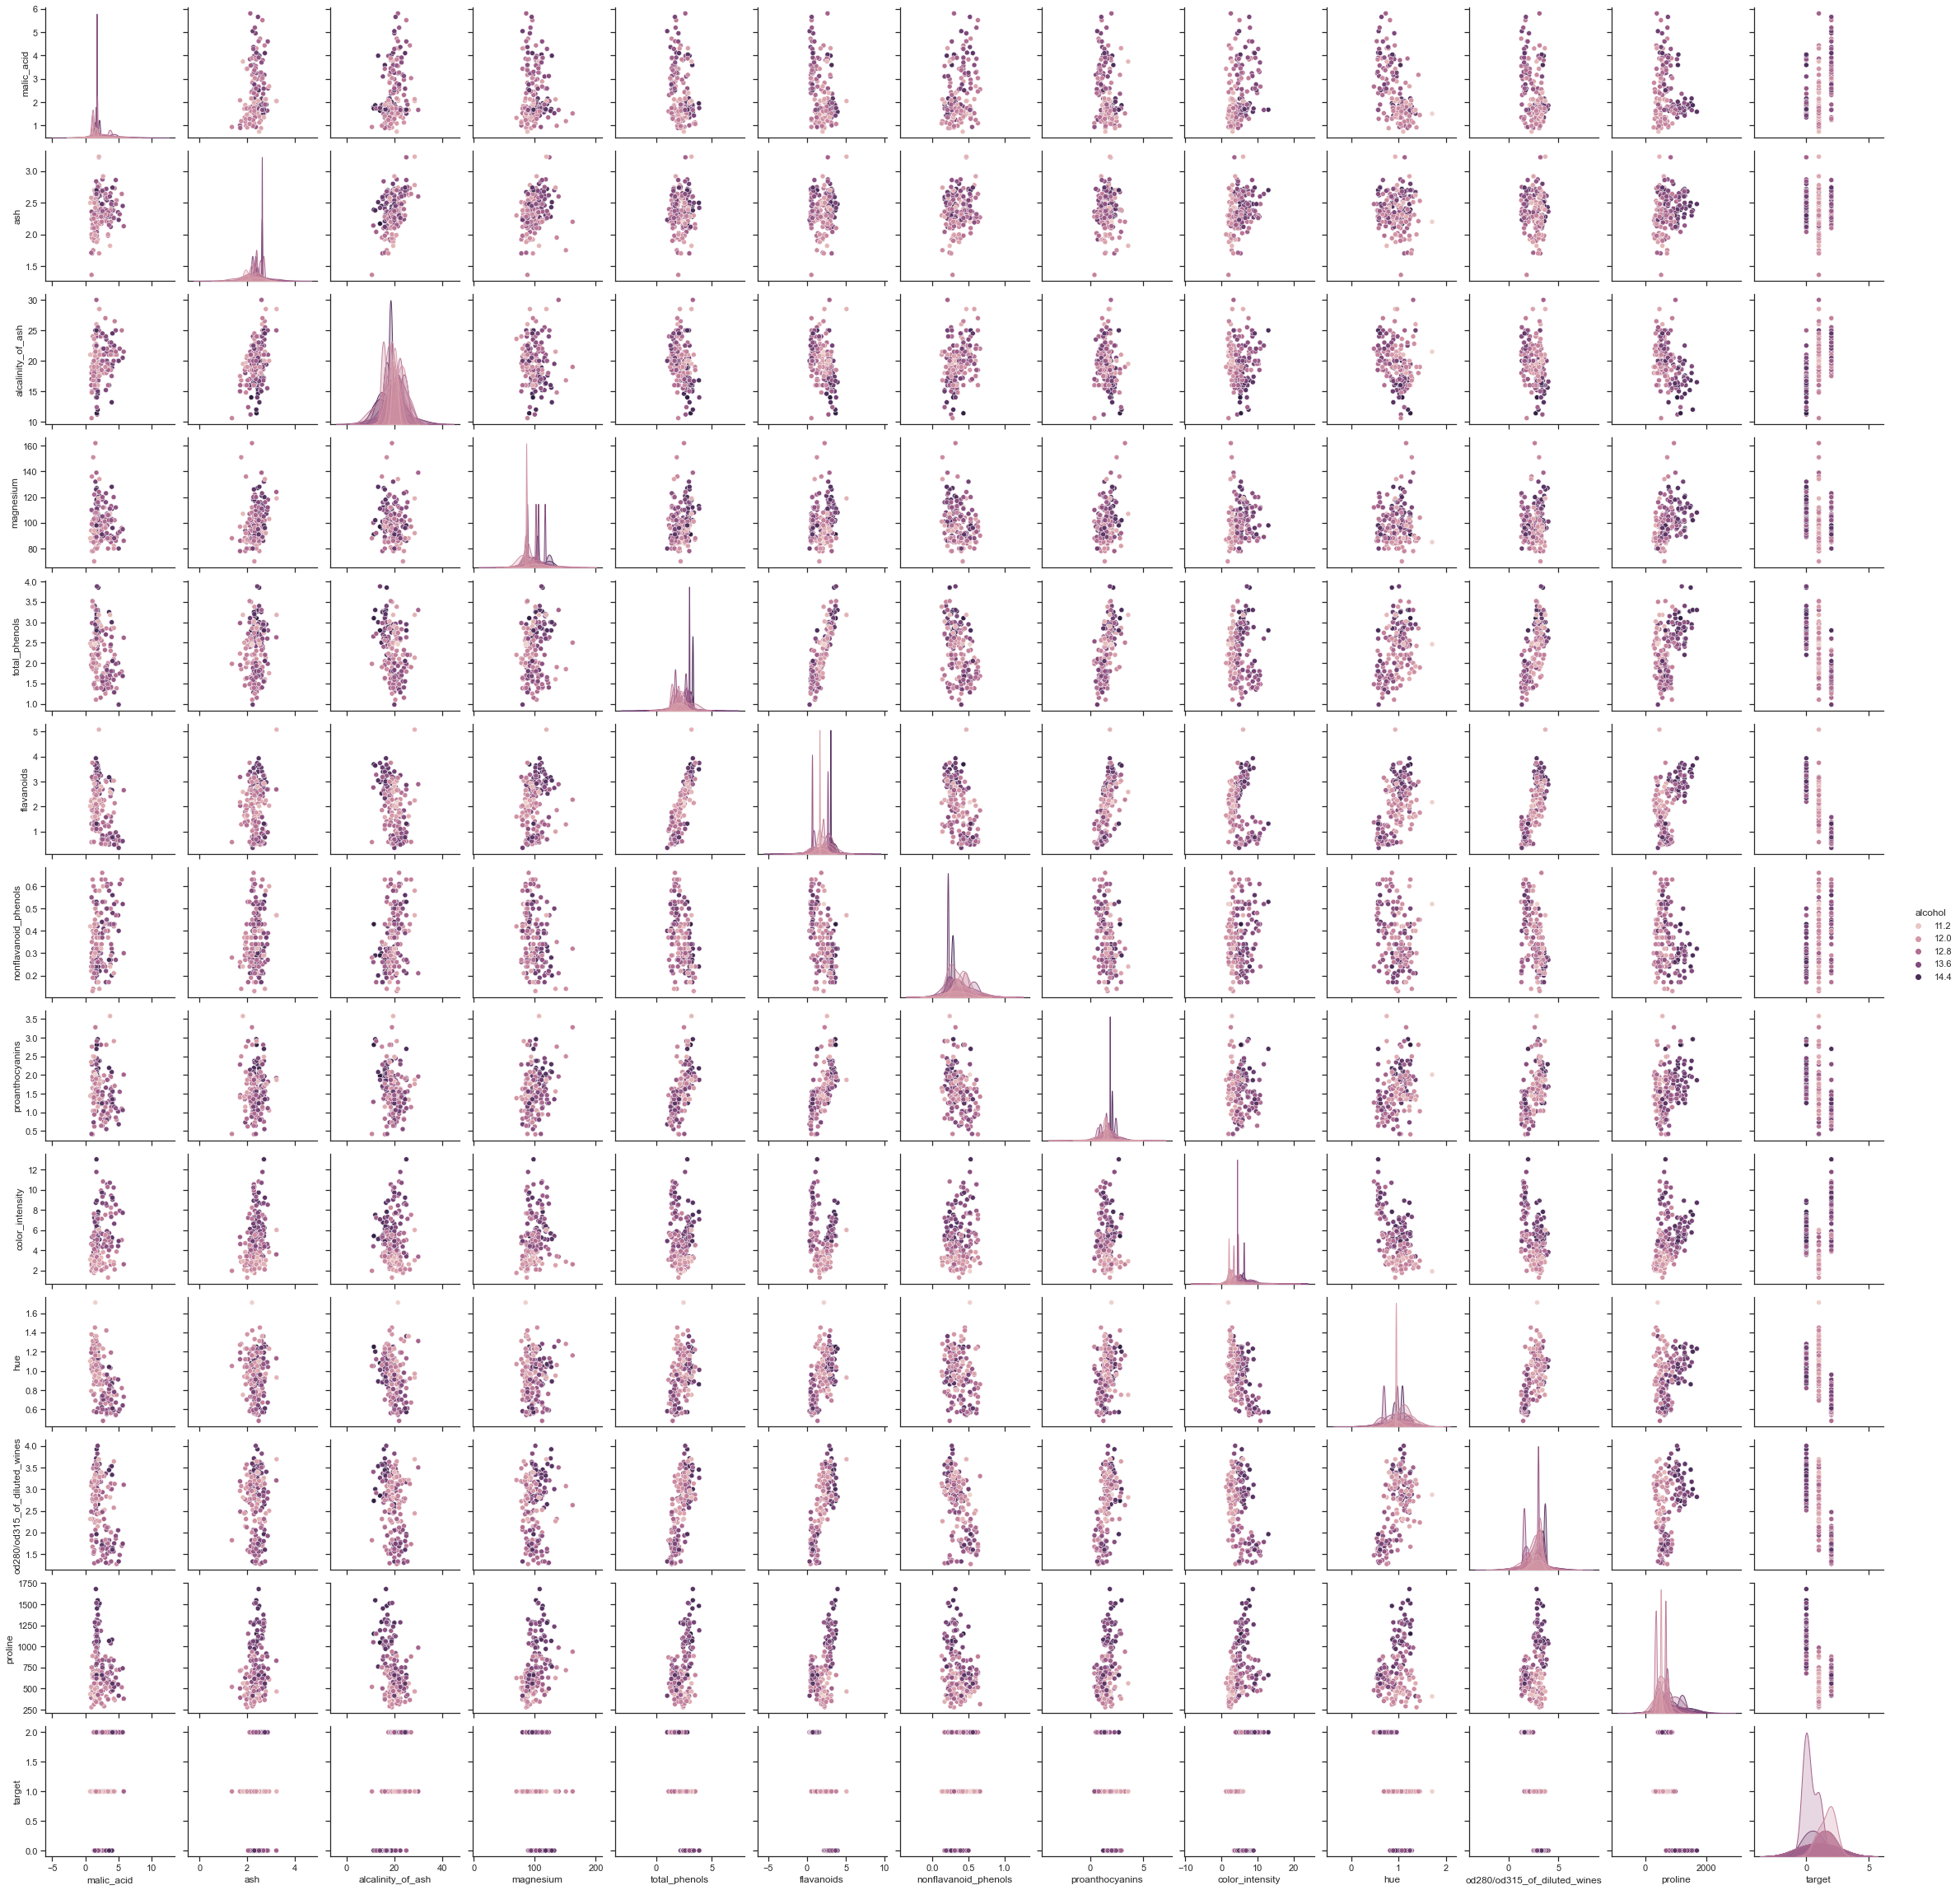

In [18]:
sns.pairplot(data1, hue="alcohol")

### Ящик с усами
Отображает одномерное распределение вероятности.

<AxesSubplot:xlabel='alcohol'>

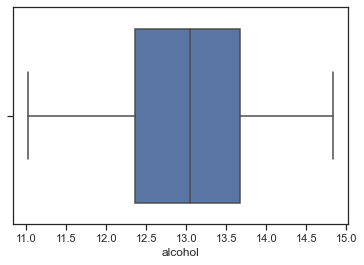

In [19]:
sns.boxplot(x=data1['alcohol'])

<AxesSubplot:ylabel='alcohol'>

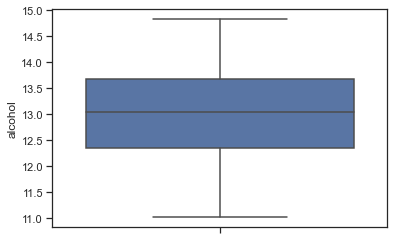

In [20]:
# По вертикали
sns.boxplot(y=data1['alcohol'])

<AxesSubplot:xlabel='alcohol', ylabel='ash'>

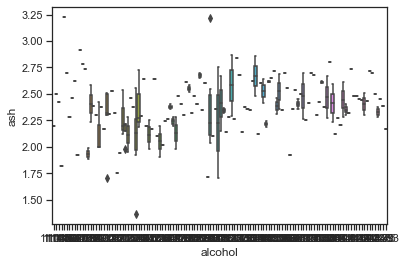

In [21]:
# Распределение параметра alcohol сгруппированные по ash.
sns.boxplot(x='alcohol', y='ash', data=data1)

### Violin plot
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности - https://en.wikipedia.org/wiki/Kernel_density_estimation

<AxesSubplot:xlabel='alcohol'>

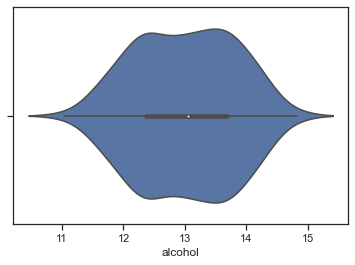

In [22]:
sns.violinplot(x=data1['alcohol'])

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

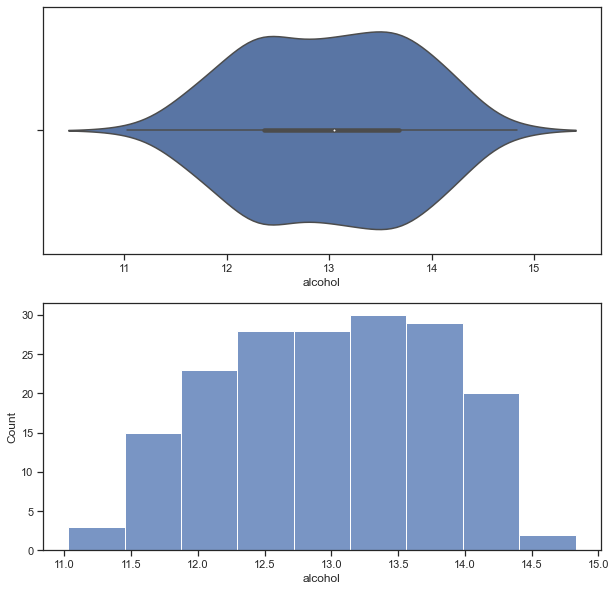

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data1['alcohol'])
sns.histplot(data1['alcohol'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

<AxesSubplot:xlabel='alcohol', ylabel='ash'>

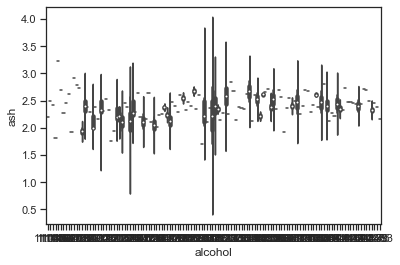

In [24]:
# Распределение параметра alcohol сгруппированные по ash.
sns.violinplot(x='alcohol', y='ash', data=data1)

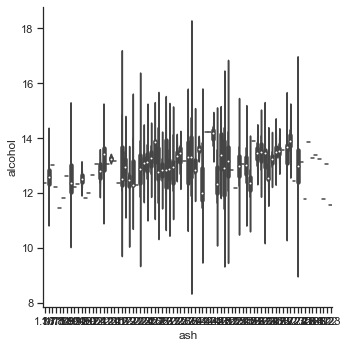

In [25]:
sns.catplot(y='alcohol', x='ash', data=data1, kind="violin", split=True)

## 4) Информация о корреляции признаков
Проверка корреляции признаков позволяет решить две задачи:

Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "alcohol"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [26]:
data1.corr()

alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   
target                       -0.328222    0.437776 -0.049643   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.310235   0.270798       0.289101   
malic_acid                             0.288500  -0.054575      -0.335167   
ash                                    0.443367   0.286587       0.128980   
alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
magnesium                             -0.083333   1.000000       0.214401   
total_phenols                         -0.321113   0.214401       1.000000   
flavanoids                            -0.351370   0.195784       0.864564   
nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
proanthocyanins                       -0.197327   0.236441       0.612413   
color_intensity                        0.018732   0.199950      -0.055136   
hue                                   -0.273955   0.055398       0.433681   
od280/od315_of_diluted_wines          -0.276769   0.066004       0.699949   
proline                               -0.440597   0.393351       0.498115   
target                                 0.517859  -0.209179      -0.719163   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.236815             -0.155929   
malic_acid                     -0.411007              0.292977   
ash                             0.115077              0.186230   
alcalinity_of_ash              -0.351370              0.361922   
magnesium                       0.195784             -0.256294   
total_phenols                   0.864564             -0.449935   
flavanoids                      1.000000             -0.537900   
nonflavanoid_phenols           -0.537900              1.000000   
proanthocyanins                 0.652692             -0.365845   
color_intensity                -0.172379              0.139057   
hue                             0.543479             -0.262640   
od280/od315_of_diluted_wines    0.787194             -0.503270   
proline                         0.494193             -0.311385   
target                         -0.847498              0.489109   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.136698         0.546364 -0.071747   
malic_acid                          -0.220746         0.248985 -0.561296   
ash                                  0.009652         0.258887 -0.074667   
alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
magnesium                            0.236441         0.199950  0.055398   
total_phenols                        0.612413        -0.055136  0.433681   
flavanoids                           0.652692        -0.172379  0.543479   
nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
proanthocyanins                      1.000000        -0.025250  0.295544   
color_intensity                     -0.025250         1.000000 -0.521813   
hue                                  0.295544        -0.521813  1.000000   
od280/od315

Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

Описание метода corr - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

По умолчанию при построении матрицы используется коэффициент корреляции Пирсона. Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [27]:
data1.corr(method='pearson')

alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   
target                       -0.328222    0.437776 -0.049643   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.310235   0.270798       0.289101   
malic_acid                             0.288500  -0.054575      -0.335167   
ash                                    0.443367   0.286587       0.128980   
alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
magnesium                             -0.083333   1.000000       0.214401   
total_phenols                         -0.321113   0.214401       1.000000   
flavanoids                            -0.351370   0.195784       0.864564   
nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
proanthocyanins                       -0.197327   0.236441       0.612413   
color_intensity                        0.018732   0.199950      -0.055136   
hue                                   -0.273955   0.055398       0.433681   
od280/od315_of_diluted_wines          -0.276769   0.066004       0.699949   
proline                               -0.440597   0.393351       0.498115   
target                                 0.517859  -0.209179      -0.719163   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.236815             -0.155929   
malic_acid                     -0.411007              0.292977   
ash                             0.115077              0.186230   
alcalinity_of_ash              -0.351370              0.361922   
magnesium                       0.195784             -0.256294   
total_phenols                   0.864564             -0.449935   
flavanoids                      1.000000             -0.537900   
nonflavanoid_phenols           -0.537900              1.000000   
proanthocyanins                 0.652692             -0.365845   
color_intensity                -0.172379              0.139057   
hue                             0.543479             -0.262640   
od280/od315_of_diluted_wines    0.787194             -0.503270   
proline                         0.494193             -0.311385   
target                         -0.847498              0.489109   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.136698         0.546364 -0.071747   
malic_acid                          -0.220746         0.248985 -0.561296   
ash                                  0.009652         0.258887 -0.074667   
alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
magnesium                            0.236441         0.199950  0.055398   
total_phenols                        0.612413        -0.055136  0.433681   
flavanoids                           0.652692        -0.172379  0.543479   
nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
proanthocyanins                      1.000000        -0.025250  0.295544   
color_intensity                     -0.025250         1.000000 -0.521813   
hue                                  0.295544        -0.521813  1.000000   
od280/od315

In [28]:
data1.corr(method='kendall')

alcohol  malic_acid       ash  \
alcohol                       1.000000    0.093844  0.170154   
malic_acid                    0.093844    1.000000  0.158178   
ash                           0.170154    0.158178  1.000000   
alcalinity_of_ash            -0.212978    0.210119  0.258352   
magnesium                     0.250506    0.050869  0.254246   
total_phenols                 0.209099   -0.174929  0.089855   
flavanoids                    0.191087   -0.211918  0.049474   
nonflavanoid_phenols         -0.109554    0.175129  0.098937   
proanthocyanins               0.133526   -0.168714  0.018240   
color_intensity               0.434353    0.195607  0.187786   
hue                          -0.021717   -0.388707 -0.037234   
od280/od315_of_diluted_wines  0.061513   -0.162909 -0.006341   
proline                       0.449387   -0.044660  0.171574   
target                       -0.238984    0.247494 -0.038085   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.212978   0.250506       0.209099   
malic_acid                             0.210119   0.050869      -0.174929   
ash                                    0.258352   0.254246       0.089855   
alcalinity_of_ash                      1.000000  -0.121005      -0.256669   
magnesium                             -0.121005   1.000000       0.172195   
total_phenols                         -0.256669   0.172195       1.000000   
flavanoids                            -0.309865   0.161603       0.701999   
nonflavanoid_phenols                   0.278091  -0.158361      -0.310443   
proanthocyanins                       -0.171404   0.117871       0.466517   
color_intensity                       -0.057281   0.241781       0.028264   
hue                                   -0.239210   0.023760       0.289210   
od280/od315_of_diluted_wines          -0.226253   0.034307       0.478267   
proline                               -0.313218   0.343016       0.280203   
target                                 0.449402  -0.184992      -0.590404   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.191087             -0.109554   
malic_acid                     -0.211918              0.175129   
ash                             0.049474              0.098937   
alcalinity_of_ash              -0.309865              0.278091   
magnesium                       0.161603             -0.158361   
total_phenols                   0.701999             -0.310443   
flavanoids                      1.000000             -0.378099   
nonflavanoid_phenols           -0.378099              1.000000   
proanthocyanins                 0.534615             -0.269189   
color_intensity                 0.028674              0.036065   
hue                             0.354372             -0.179755   
od280/od315_of_diluted_wines    0.520448             -0.363787   
proline                         0.263661             -0.174108   
target                         -0.725255              0.379234   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.133526         0.434353 -0.021717   
malic_acid                          -0.168714         0.195607 -0.388707   
ash                                  0.018240         0.187786 -0.037234   
alcalinity_of_ash                   -0.171404        -0.057281 -0.239210   
magnesium                            0.117871         0.241781  0.023760   
total_phenols                        0.466517         0.028264  0.289210   
flavanoids                           0.534615         0.028674  0.354372   
nonflavanoid_phenols                -0.269189         0.036065 -0.179755   
proanthocyanins                      1.000000        -0.014962  0.231071   
color_intensity                     -0.014962         1.000000 -0.291561   
hue                                  0.231071        -0.291561  1.000000   
od280/od315

In [29]:
data1.corr(method='spearman')

alcohol  malic_acid       ash  \
alcohol                       1.000000    0.140430  0.243722   
malic_acid                    0.140430    1.000000  0.230674   
ash                           0.243722    0.230674  1.000000   
alcalinity_of_ash            -0.306598    0.304069  0.366374   
magnesium                     0.365503    0.080188  0.361488   
total_phenols                 0.310920   -0.280225  0.132193   
flavanoids                    0.294740   -0.325202  0.078796   
nonflavanoid_phenols         -0.162207    0.255236  0.145583   
proanthocyanins               0.192734   -0.244825  0.024384   
color_intensity               0.635425    0.290307  0.283047   
hue                          -0.024203   -0.560265 -0.050183   
od280/od315_of_diluted_wines  0.103050   -0.255185 -0.007500   
proline                       0.633580   -0.057466  0.253163   
target                       -0.354167    0.346913 -0.053988   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.306598   0.365503       0.310920   
malic_acid                             0.304069   0.080188      -0.280225   
ash                                    0.366374   0.361488       0.132193   
alcalinity_of_ash                      1.000000  -0.169558      -0.376657   
magnesium                             -0.169558   1.000000       0.246417   
total_phenols                         -0.376657   0.246417       1.000000   
flavanoids                            -0.443770   0.233167       0.879404   
nonflavanoid_phenols                   0.389390  -0.236786      -0.448013   
proanthocyanins                       -0.253695   0.173647       0.666689   
color_intensity                       -0.073776   0.357029       0.011162   
hue                                   -0.352507   0.036095       0.439457   
od280/od315_of_diluted_wines          -0.325890   0.056963       0.687207   
proline                               -0.456090   0.507575       0.419470   
target                                 0.569792  -0.250498      -0.726544   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.294740             -0.162207   
malic_acid                     -0.325202              0.255236   
ash                             0.078796              0.145583   
alcalinity_of_ash              -0.443770              0.389390   
magnesium                       0.233167             -0.236786   
total_phenols                   0.879404             -0.448013   
flavanoids                      1.000000             -0.543897   
nonflavanoid_phenols           -0.543897              1.000000   
proanthocyanins                 0.730322             -0.384629   
color_intensity                -0.042910              0.059639   
hue                             0.535430             -0.267813   
od280/od315_of_diluted_wines    0.741533             -0.494950   
proline                         0.429904             -0.270112   
target                         -0.854908              0.474205   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.192734         0.635425 -0.024203   
malic_acid                          -0.244825         0.290307 -0.560265   
ash                                  0.024384         0.283047 -0.050183   
alcalinity_of_ash                   -0.253695        -0.073776 -0.352507   
magnesium                            0.173647         0.357029  0.036095   
total_phenols                        0.666689         0.011162  0.439457   
flavanoids                           0.730322        -0.042910  0.535430   
nonflavanoid_phenols                -0.384629         0.059639 -0.267813   
proanthocyanins                      1.000000        -0.030947  0.342795   
color_intensity                     -0.030947         1.000000 -0.418522   
hue                                  0.342795        -0.418522  1.000000   
od280/od315

В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен.

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn - https://seaborn.pydata.org/generated/seaborn.heatmap.html

<AxesSubplot:>

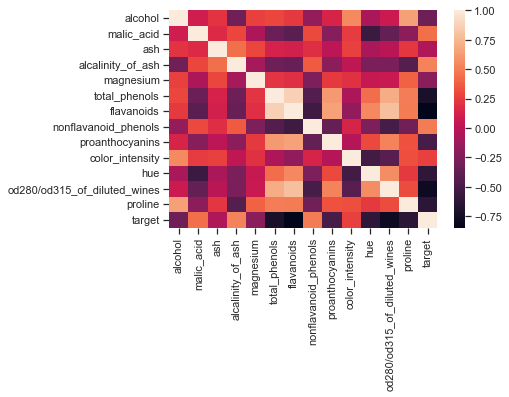

In [30]:
sns.heatmap(data1.corr())

<AxesSubplot:>

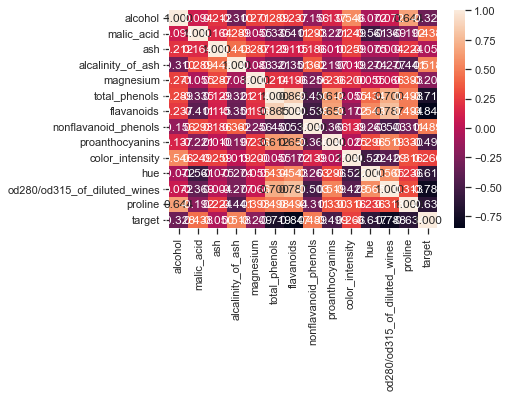

In [31]:
# Вывод значений в ячейках
sns.heatmap(data1.corr(), annot=True, fmt='.3f')

<AxesSubplot:>

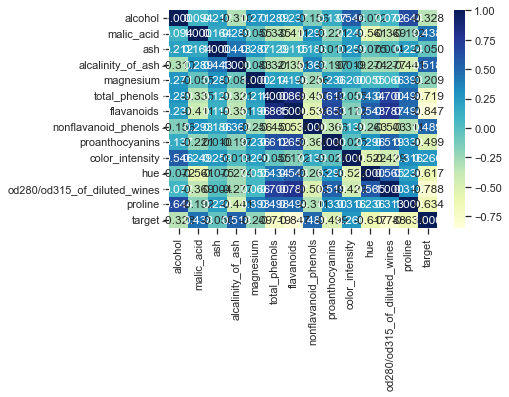

In [32]:
# Изменение цветовой гаммы
sns.heatmap(data1.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

<AxesSubplot:>

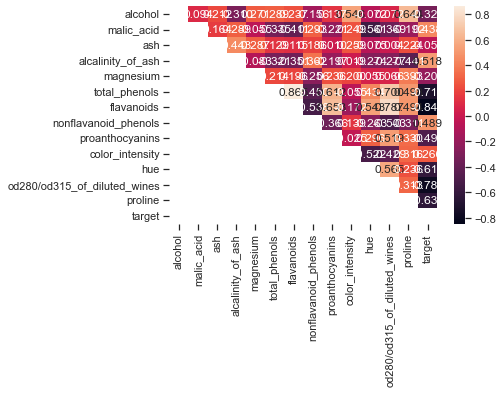

In [33]:
# Треугольный вариант матрицы
mask = np.zeros_like(data1.corr(), dtype=bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data1.corr(), mask=mask, annot=True, fmt='.3f')

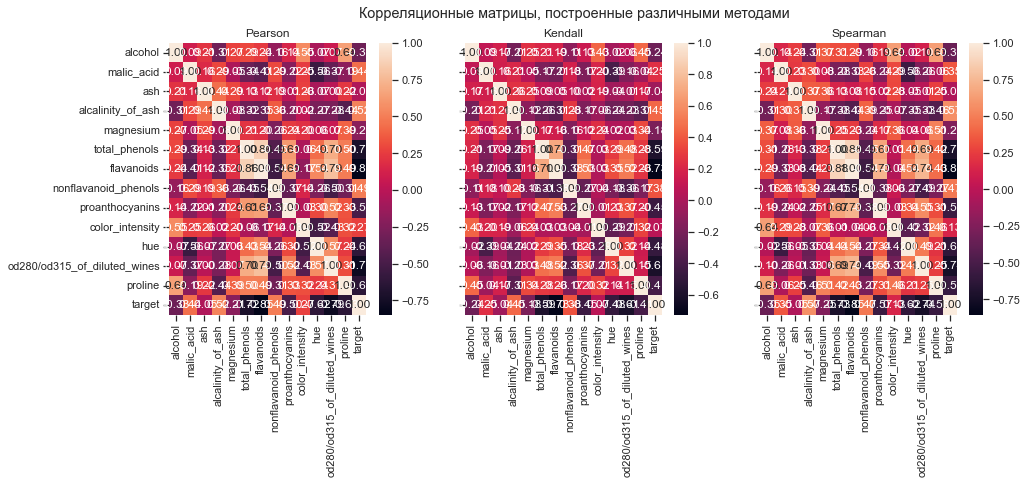

In [34]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data1.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data1.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data1.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')